In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ipl = pd.read_csv('../data/ipl_matches.csv')
odi = pd.read_csv('../data/odi_matches.csv')
t20 = pd.read_csv('../data/t20_matches.csv')
test = pd.read_csv('../data/test_matches.csv')

ipl['format'] = 'IPL'
odi['format'] = 'ODI'
t20['format'] = 'T20'
test['format'] = 'Test'

all_matches = pd.concat([ipl, odi, t20, test], ignore_index=True)


C:\Users\Gopinath\AppData\Local\Temp\ipykernel_29964\1929225523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_matches, x='format', palette='Set2')


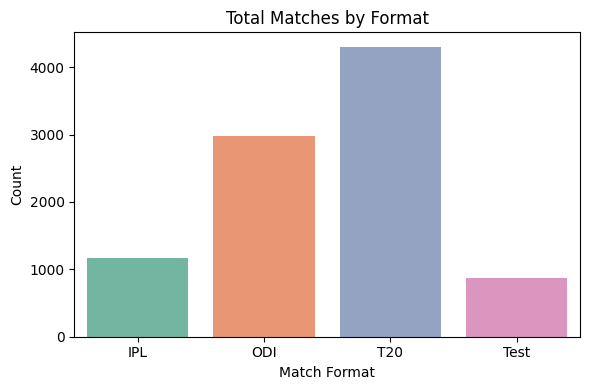

In [2]:
plt.figure(figsize=(6, 4))
sns.countplot(data=all_matches, x='format', palette='Set2')
plt.title("Total Matches by Format")
plt.xlabel("Match Format")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

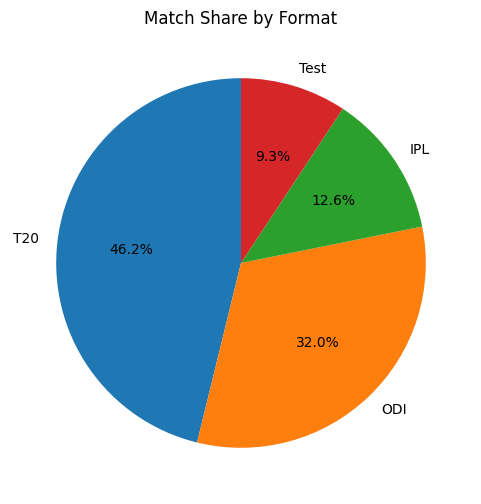

In [3]:
format_counts = all_matches['format'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Share by Format")
plt.show()

C:\Users\Gopinath\AppData\Local\Temp\ipykernel_29964\3847378343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='viridis')


Text(0.5, 1.0, 'Top 10 Most Used Venues')

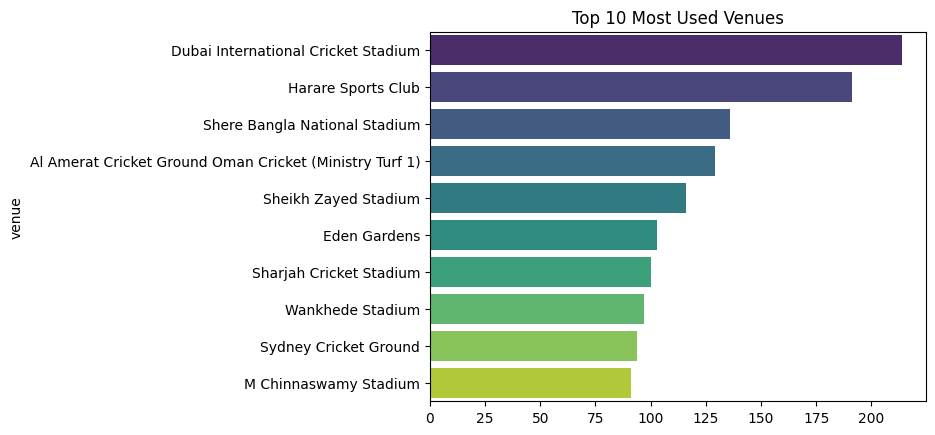

In [4]:
top_venues = all_matches['venue'].value_counts().nlargest(10)
sns.barplot(x=top_venues.values, y=top_venues.index, palette='viridis')
plt.title("Top 10 Most Used Venues")

Text(0.5, 1.0, 'IPL Teams with Most Wins')

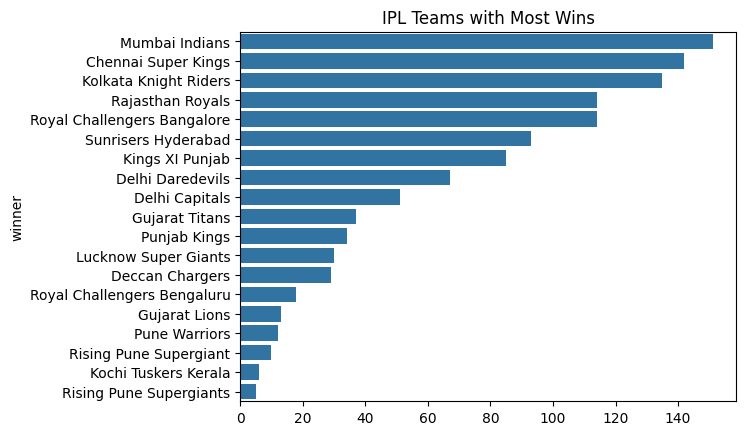

In [5]:
ipl_wins = ipl['winner'].value_counts()
sns.barplot(x=ipl_wins.values, y=ipl_wins.index)
plt.title("IPL Teams with Most Wins")

Text(0.5, 1.0, 'Top Cities Hosting ODI Matches')

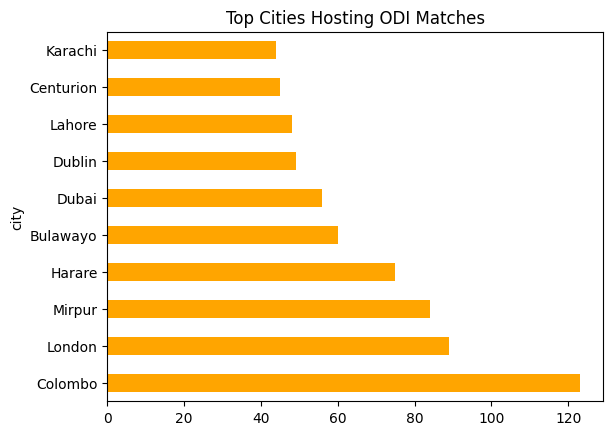

In [6]:
odi_city = odi['city'].value_counts().nlargest(10)
odi_city.plot(kind='barh', color='orange')
plt.title("Top Cities Hosting ODI Matches")


Text(0.5, 1.0, 'T20: Toss Winner vs Match Winner')

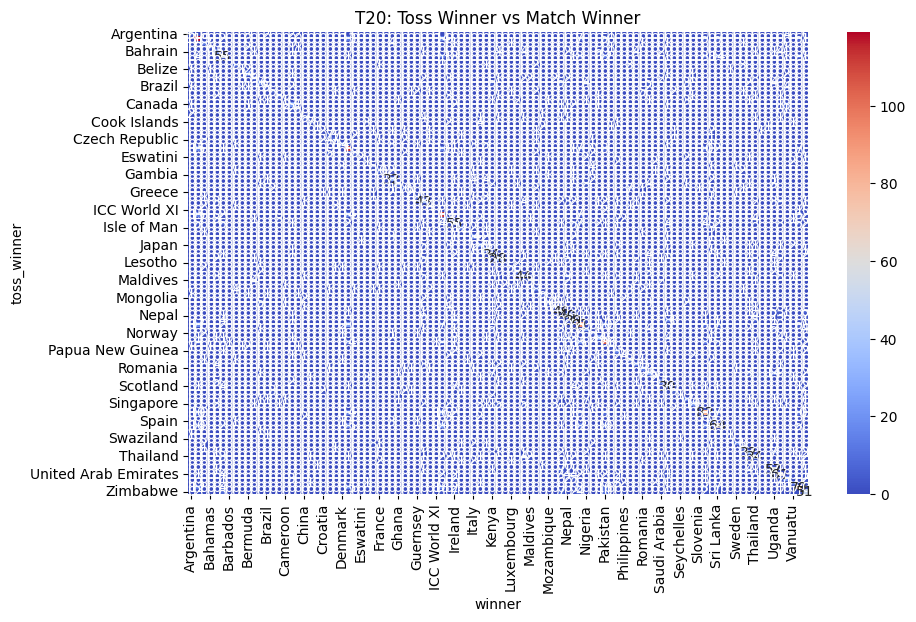

In [7]:
heat_df = pd.crosstab(t20['toss_winner'], t20['winner'])
plt.figure(figsize=(10,6))
sns.heatmap(heat_df, annot=True, fmt='d', cmap='coolwarm')
plt.title("T20: Toss Winner vs Match Winner")


Text(0.5, 1.0, 'Drawn Test Matches Ratio')

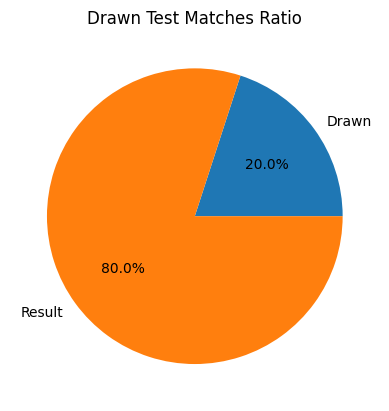

In [8]:
test_results = test['winner'].isna().sum()
plt.pie([test_results, len(test)-test_results], labels=['Drawn', 'Result'], autopct='%1.1f%%')
plt.title("Drawn Test Matches Ratio")


Text(0.5, 1.0, 'IPL Matches per Year')

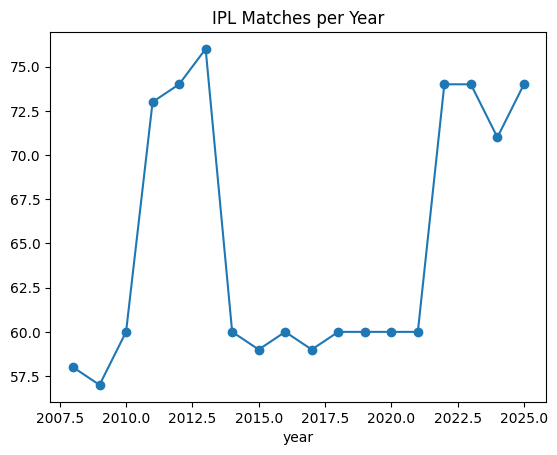

In [9]:
ipl['year'] = pd.to_datetime(ipl['date']).dt.year
ipl_yearly = ipl['year'].value_counts().sort_index()
ipl_yearly.plot(kind='line', marker='o')
plt.title("IPL Matches per Year")


Text(0.5, 1.0, 'City Distribution by Match Format')

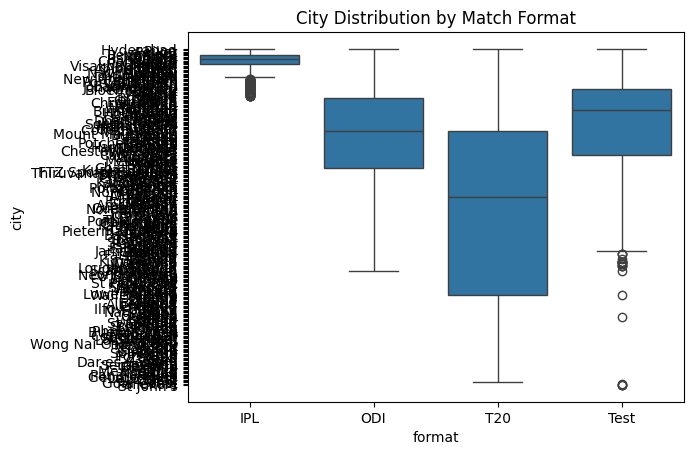

In [10]:
sns.boxplot(data=all_matches.dropna(subset=['city']), x='format', y='city')
plt.title("City Distribution by Match Format")


In [11]:
fig = px.sunburst(all_matches.dropna(subset=['winner']), 
                  path=['format', 'winner'],
                  values=None,
                  title="Wins by Format → Team")
fig.show()


In [12]:
ipl_toss_win = ipl[ipl['toss_winner'] == ipl['winner']]
win_rate = len(ipl_toss_win) / len(ipl) * 100
print(f"Toss winner also won the match in {win_rate:.2f}% of IPL matches.")


Toss winner also won the match in 50.56% of IPL matches.


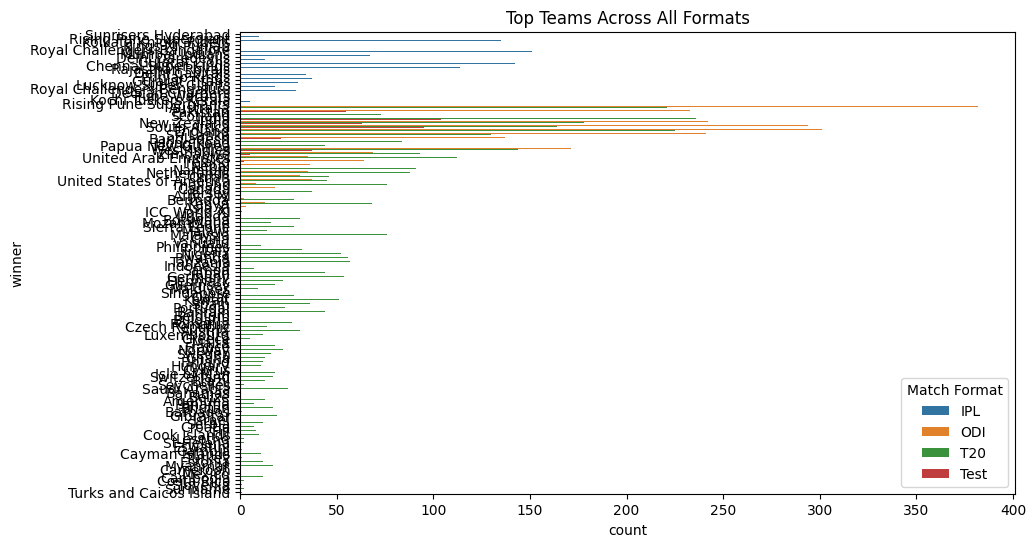

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=all_matches.dropna(subset=['winner']), y='winner', hue='format')
plt.title("Top Teams Across All Formats")
plt.legend(title='Match Format')
